In [1]:
import pickle
import pandas as pd

In [2]:
df_1 = pickle.load(open('./Data/cleaned_call_for_service_1','rb'))
df_2 = pickle.load(open('./Data/cleaned_call_for_service_2','rb'))
df_3 = pickle.load(open('./Data/cleaned_call_for_service_3','rb'))

In [12]:
df = pd.concat([df_1,df_2,df_3])

In [13]:
df.shape

(1407125, 22)

In [16]:
df.loc[0]

Incident Number                    130023841
Call Type                         Loud Music
Location                     3000BLK MAIN ST
Beat                                    A002
Reporting District                      02D1
Received Time         03/01/2013 12:00:40 AM
Disposition                          Advisal
Latitude                             33.9983
Longitude                            -118.48
time mark                              False
received time            2013-03-01 12:00:40
cleared time             2013-03-01 12:09:57
Line_Open                              False
Month                                      3
Year                                    2013
Day_Of_Week                                4
Day_Delta                              -1176
Solving Time                            9.28
incident date            2013-03-01 00:00:00
Violent                                    0
Larceny                                    0
Check                                      0
Name: 0, d

In [22]:
import datetime
open_date = datetime.datetime(2016, 5, 20)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Crime Type 

In [18]:
df.loc[df['Larceny'] == 1,'Call Type'].value_counts()

Audible Burglar Alarm                  51330
Petty Theft Report                     12895
Auto Burglary Report                   10597
Burglary Report                         9892
Lost Property                           8136
Identity Theft                          6388
Petty Theft Just Occurred               6115
Grand Theft Report                      5423
Bike Theft Report                       4830
Grand Theft Auto Report                 3761
Theft Suspect in Custody                2798
Vehicle Burglar Alarm                   2389
Petty Theft Now                          939
Attempt Burglary Report                  840
Burglary Just Occurred                   775
Auto Burglary Just Occurred              725
Grand Theft Just Occurred                704
Burglary Now                             703
Stolen Vehicle                           626
Burglary Investigation/Walk Through      613
Silent Burglar Alarm                     501
Auto Burglary Now                        400
Attempt Bu

###  Time Trend

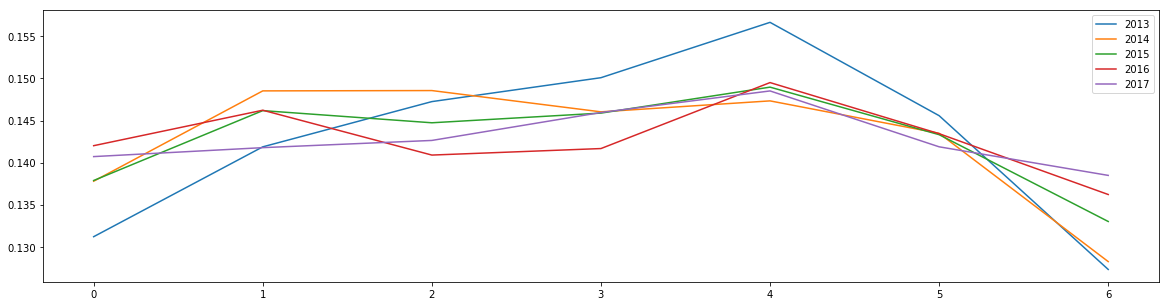

In [15]:
plt.figure(figsize=(20,5))
for i in range (2013,2018):
    dow = df[df['Year'] == i].groupby('Day_Of_Week')['Day_Of_Week'].count() / df[df['Year'] == i].shape[0]
    plt.plot(dow.index, dow, label = i)
plt.legend()
plt.show()


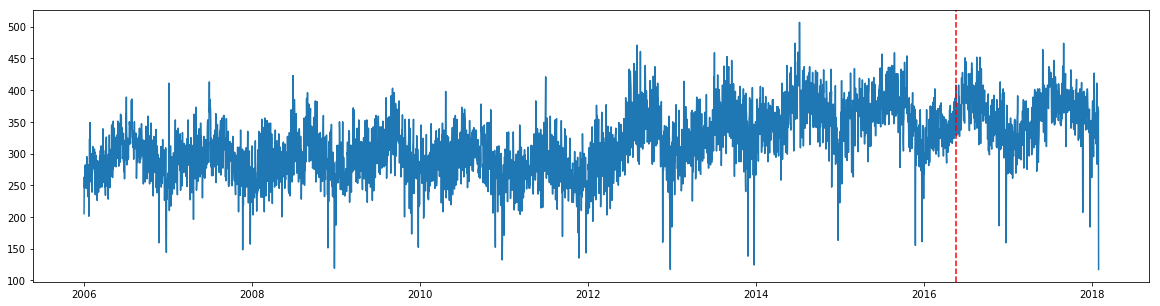

In [23]:
plt.figure(figsize=(20,5))
all_dates = df.groupby('incident date')['incident date'].count()
plt.plot(all_dates.index,all_dates)
plt.axvline(x = open_date,c='r',ls='--')
plt.show()

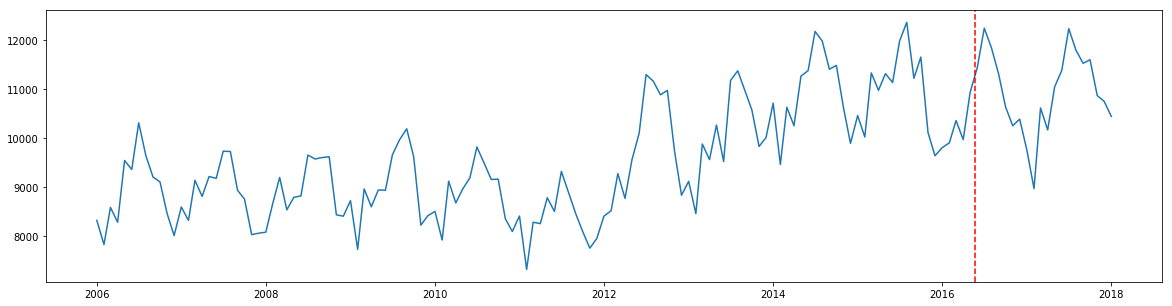

In [84]:
plt.figure(figsize=(20, 5))
all_months = df.groupby(['Year','Month'])['Month'].count()
time = [(lambda year,month: datetime.datetime(year,month,1))(year,month) for year,month in all_months.index.values]
plt.plot(time, all_months)
plt.axvline(open`_date, c = 'r', ls = '--')
plt.show()

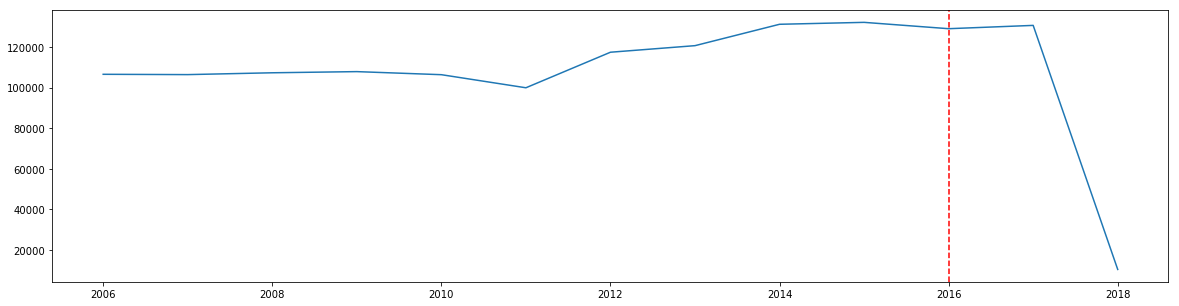

In [85]:
plt.figure(figsize=(20, 5))
all_years = df.groupby('Year')['Year'].count()
plt.plot(all_years.index, all_years)
plt.axvline(x = 2016, c = 'r', ls = '--')
plt.show()

In [99]:
def create_timeseries(df_main, column = None, value = None, window = 90):
    if column is not None:
        df = df_main[df_main[column] == value]
    else:
        df = df_main.copy()
    raw = df.groupby('incident date')['incident date'].count()
    rolling = raw.rolling(window).mean()
    return plt.plot(rolling.index, rolling, label = value)

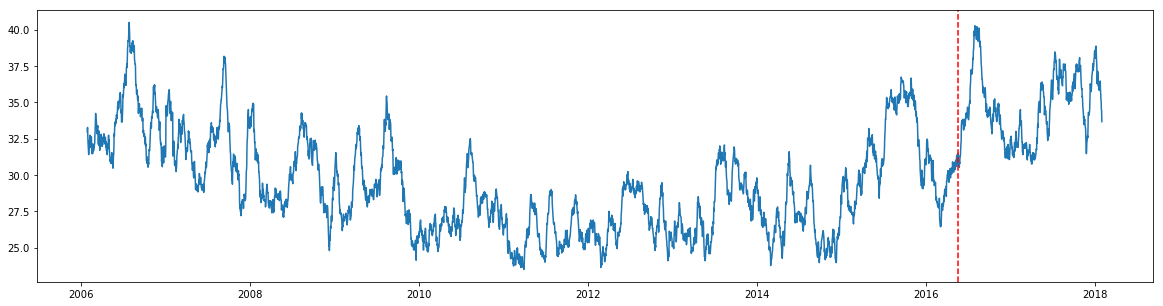

In [91]:
plt.figure(figsize=(20,5))
create_timeseries(df,column='Larceny',value=1,window=30)
plt.axvline(x=open_date,c='r',ls='--')
plt.show()

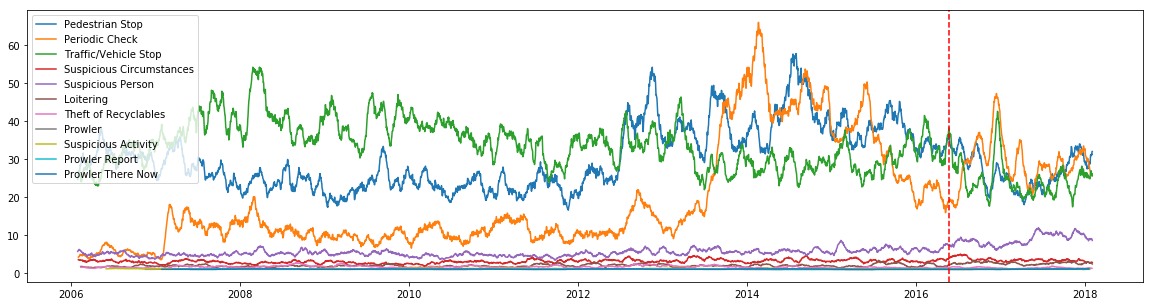

In [105]:
plt.figure(figsize=(20,5))
check = df[df['Check'] == 1]
for i in check['Call Type'].unique():
    create_timeseries(check,column='Call Type',value = i, window = 30)
# plt.axvline(x=open_date,c='r',ls='--')
plt.axvline(x=open_date,c='r',ls='--')
plt.legend()
plt.show()
